# Load Dataset

In [ ]:
%cd /content/drive/MyDrive/College/Semester_5/ComputerVision/FINPRO/PCB_Defect_Detection/Dataset/
!ls

/content/drive/MyDrive/College/Semester_5/ComputerVision/FINPRO/PCB_Defect_Detection/Dataset
 archive.zip   dataset.zip  '[Processed]PCB_Data'


In [ ]:
!unzip archive.zip -d /content/

Archive:  archive.zip
  inflating: /content/dataset/tobeaugmented/defected/20200707_085703.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_090641.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_091300.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_092157.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_092201.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_092731.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_093001.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_101023.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_101034.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_101039.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_101612.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_103238.jpg  
  inflating: /content/dataset/tobeaugmented/defected/20200707_103242.jpg  
  i

In [ ]:
%cd /content/

/content


In [ ]:
import os

In [ ]:
os.listdir("dataset/tobeaugmented/defected")

['20200707_151558.jpg',
 '20200707_113137.jpg',
 '20200707_163230.jpg',
 '20200707_101023.jpg',
 '20200707_162826.jpg',
 '20200707_112352.jpg',
 '20200707_163731.jpg',
 '20200707_150907.jpg',
 '20200707_110019.jpg',
 '20200707_153053.jpg',
 '20200707_152525.jpg',
 '20200707_164812.jpg',
 '20200707_141446.jpg',
 '20200707_150025.jpg',
 '20200707_163226.jpg',
 '20200707_170043.jpg',
 '20200707_110506.jpg',
 '20200707_165118.jpg',
 '20200707_142106.jpg',
 '20200707_171217.jpg',
 '20200707_150029.jpg',
 '20200707_143039.jpg',
 '20200707_164223.jpg',
 '20200707_161639.jpg',
 '20200707_162122.jpg',
 '20200707_105252.jpg',
 '20200707_164325.jpg',
 '20200707_085703.jpg',
 '20200707_092731.jpg',
 '20200707_101612.jpg',
 '20200707_150015.jpg',
 '20200707_163721.jpg',
 '20200707_140718.jpg',
 '20200707_151221.jpg',
 '20200707_143539.jpg',
 '20200707_143054.jpg',
 '20200707_170152.jpg',
 '20200707_144413.jpg',
 '20200707_111112.jpg',
 '20200707_153050.jpg',
 '20200707_140735.jpg',
 '20200707_16120

# SVC

In [ ]:
# Import libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        image_type_path = os.path.join(folder, filename)
        for image in os.listdir(image_type_path):
            img_path = os.path.join(image_type_path, image)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (img_width, img_height))
                img = img.flatten()  # Flatten the image to a 1D array
                images.append(img)
                if filename.lower() == "defected":
                    labels.append(1)
                else:
                    labels.append(0)
    return images, labels

In [ ]:
# Parameter
img_width, img_height = 128, 128

In [ ]:
# Load images and labels from both defective and good PCB image folders
X, y = load_images_from_folder("dataset/tobeaugmented")

# Normalize/Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the SVC model
model = SVC(kernel='linear', C=1)  # You can experiment with different kernels and C values
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        50
           1       0.96      0.86      0.91        28

    accuracy                           0.94        78
   macro avg       0.94      0.92      0.93        78
weighted avg       0.94      0.94      0.94        78

Accuracy: 0.9358974358974359


# Evaluation

In [ ]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# Example prediction (replace with your own image path)
example_img_path = "/content/dataset/tobeaugmented/defected/20200707_085703.jpg" # Example path, replace with your image path
example_img = cv2.imread(example_img_path, cv2.IMREAD_GRAYSCALE)

if example_img is not None:
  example_img = cv2.resize(example_img, (img_width, img_height))
  example_img = example_img.flatten()
  example_img = scaler.transform([example_img]) # important to scale the input as well
  prediction = model.predict(example_img)

  if prediction[0] == 1:
      print(f"The image {example_img_path} is predicted as defective.")
  else:
      print(f"The image {example_img_path} is predicted as good.")

else:
  print(f"Error: Could not load image at {example_img_path}")

The image /content/dataset/tobeaugmented/defected/20200707_085703.jpg is predicted as defective.


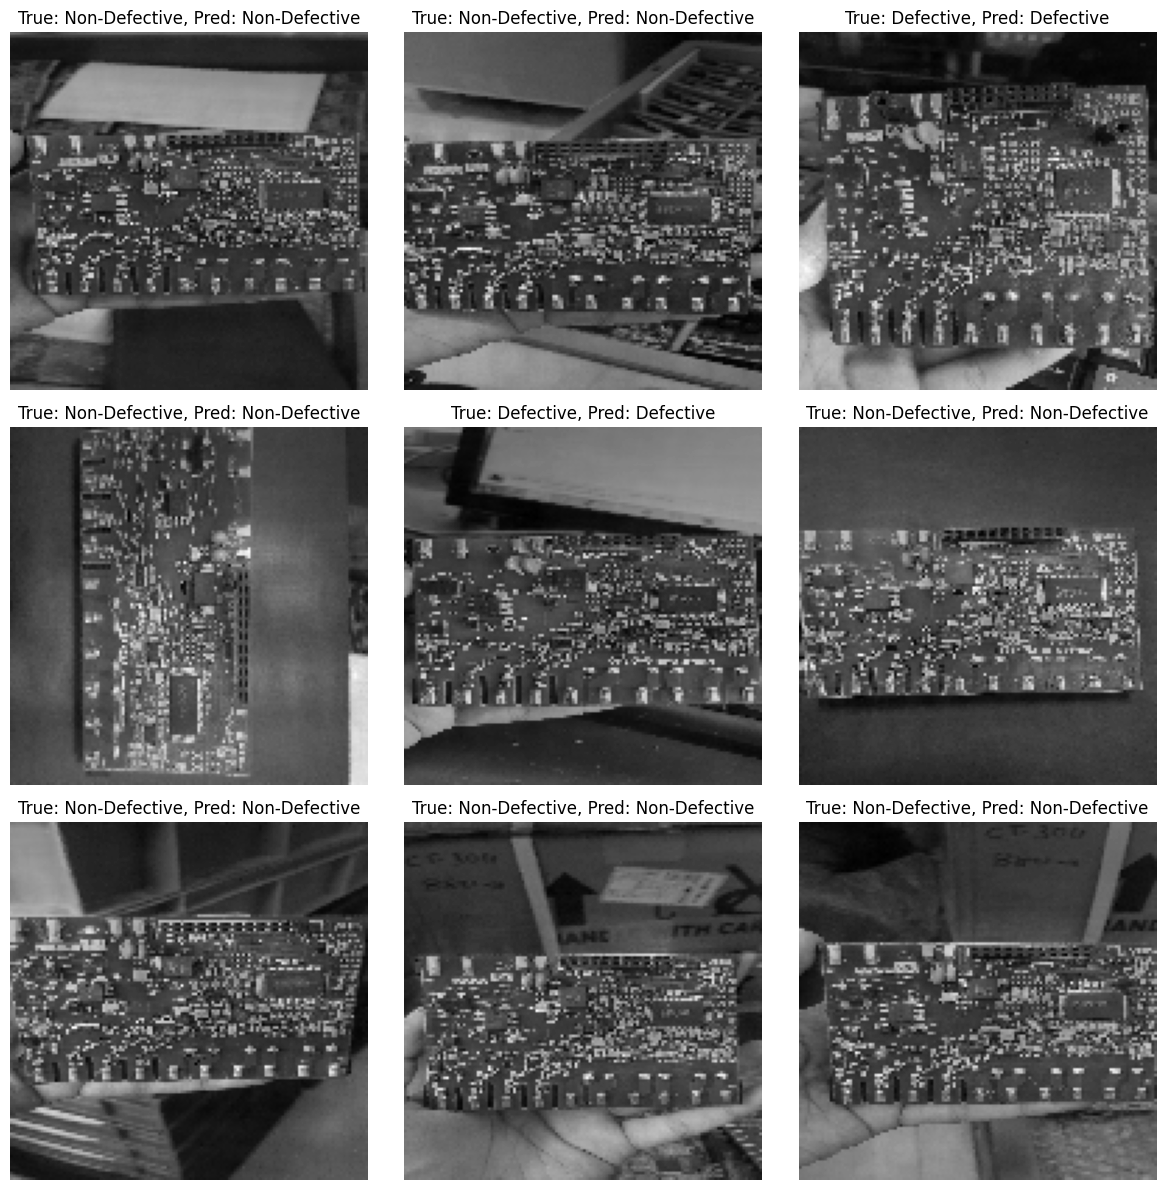

In [ ]:
import matplotlib.pyplot as plt

# Select 9 random samples from the test set
num_samples = 9
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)
X_test_sample = X_test[random_indices]
y_test_sample = np.array(y_test)[random_indices]
y_pred_sample = y_pred[random_indices]


# Reshape the flattened images back to their original dimensions
X_test_sample_reshaped = X_test_sample.reshape(-1, img_width, img_height)

# Plot the images along with true and predicted labels
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

class_names = ["Non-Defective","Defective"]

for i in range(num_samples):
    axes[i].imshow(X_test_sample_reshaped[i], cmap='gray')
    axes[i].set_title(f"True: {class_names[y_test_sample[i]]}, Pred: {class_names[y_pred_sample[i]]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()